In [31]:
from __future__ import division
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Reading saved tweets
df_aft=pd.read_csv('output_aft.txt')

In [22]:
df_aft.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10
0,LanaResistance,2017-02-17 00:28,0,0,Trump: Does anyone think Clinton would be toug...,NaN,NaN,NaN,8.32303119161627E+017,https://twitter.com/LanaResistance/status/8323...,NaN
1,TigerBites,2017-02-17 00:28,0,0,"Ahh, brings a tear to my eye... tears from lau...",NaN,NaN,#donaldtrump,8.32303117031109E+017,https://twitter.com/TigerBites/status/83230311...,NaN
2,DRHSAPUSGovt,2017-02-17 00:28,0,0,Donald Trump 's strange handshake style and ho...,NaN,NaN,NaN,8.32303116691268E+017,https://twitter.com/DRHSAPUSGovt/status/832303...,NaN
3,Spagel77,2017-02-17 00:28,0,0,"@BBCBreaking Donald Trump calls out BBC as ""Fa...",NaN,@BBCBreaking,NaN,8.32303116091535E+017,https://twitter.com/Spagel77/status/8323031160...,NaN
4,kfury,2017-02-17 00:28,0,0,Someone needs to dare Donald Trump to go under...,NaN,NaN,NaN,8.32303114061435E+017,https://twitter.com/kfury/status/8323031140614...,NaN


In [24]:
#Cleaning tweets
analysis=[]
for i in range(len(df_aft)):
    df_aft['text'][i]=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", df_aft['text'][i]).split())
    analysis.append(TextBlob(df_aft['text'][i]))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
#getting analysis
analysed=[]
sentiment_score=[]
for i in range(len(df_aft)):
    sentiment_score.append(analysis[i].sentiment.polarity)
    if analysis[i].sentiment.polarity>0:
        analysed.append('positive')
    elif analysis[i].sentiment.polarity==0:
        analysed.append('neutral')
    elif analysis[i].sentiment.polarity<0:
        analysed.append('negetive')

In [27]:
df_aft_fin=pd.DataFrame(columns=['username','date','tweets','analysis','sentiment_score'])

In [28]:
df_aft_fin['username']=df_aft['username']
df_aft_fin['date']=df_aft['date']
df_aft_fin['tweets']=df_aft['text']
df_aft_fin['analysis']=analysed
df_aft_fin['sentiment_score']=sentiment_score

In [29]:
pos=0
neg=0
neu=0
for i in range(len(df_aft_fin)):
    if df_aft_fin.analysis[i]=='positive':
        pos=pos+1
    elif df_aft_fin.analysis[i]=='negetive':
        neg=neg+1
    elif df_aft_fin.analysis[i]=='neutral':
        neu=neu+1


In [30]:
print('Positive percentage:',pos/len(df_aft_fin)*100)
print('Negetive percentage:',(neg/len(df_aft_fin))*100)
print('Neutral percentage:',(neu/len(df_aft_fin))*100)

('Positive percentage:', 32.34655078761543)
('Negetive percentage:', 22.705051602390007)
('Neutral percentage:', 44.948397609994565)


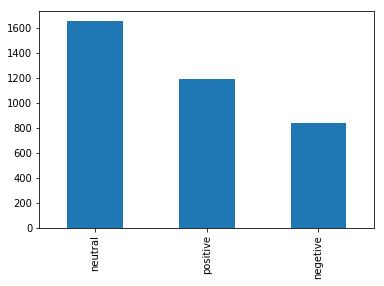

In [35]:
df_aft_fin['analysis'].value_counts().plot(kind='bar')

In [ ]:
w = df_aft_fin['analysis'].value_counts().plot(kind='bar')